In [11]:
import pandas as pd

# Define custom column names
column_names = ['label', 'sms_message']

# Read the tab-separated data file into a DataFrame with custom column names
data_frame = pd.read_csv('/content/drive/MyDrive/GenzeonMLPrep/26-06-2023/SMSSpamCollection', sep='\t', header=None, names=column_names)

# Display the DataFrame
print(data_frame)

     label                                        sms_message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [12]:
import pandas as pd
from collections import Counter

# Filter out the spam messages from the DataFrame
spam_messages = data_frame[data_frame['label'] == 'spam']

# Concatenate all the spam message contents into a single string
spam_text = ' '.join(spam_messages['sms_message'].tolist())

# Split the spam text into individual words
words = spam_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Set the number of most repeated words you want to retrieve
num_most_common = 20

# Get the most repeated words
most_common_words = word_counts.most_common(num_most_common)

# Display the most repeated words
for word, count in most_common_words:
    print(word, count)

to 607
a 360
your 187
call 185
or 185
the 178
2 169
for 169
you 164
is 143
Call 136
on 136
have 128
and 119
from 116
ur 107
with 101
& 98
4 93
of 93


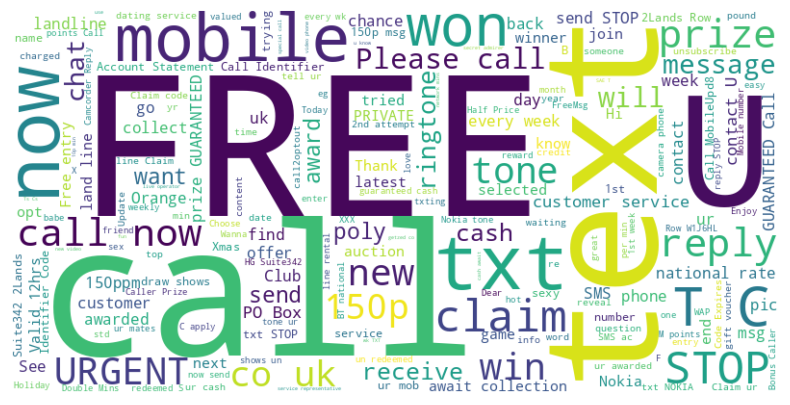

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_messages = data_frame[data_frame['label'] == 'spam']

spam_text = ' '.join(spam_messages['sms_message'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [14]:
#DATA PREPROCESSING


#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

data_frame['label']=label_encoder.fit_transform(data_frame['label'])

In [15]:
data_frame

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
#Bag Of Words Concept/Count vectorizer

documents = ['Hello! how are you!',
             'Win money, win from home',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
print(cv)

CountVectorizer()


In [18]:
cv.fit(documents)

CountVectorizer()

In [19]:
cv.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [20]:
type(cv)

sklearn.feature_extraction.text.CountVectorizer

Build a matrix - feature values as words and row values as counts in specific documents

In [21]:
cv.transform(documents).toarray()

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [22]:
documents = ['Hello! how are you!',
             'Win money, win from home',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [23]:
matrix = pd.DataFrame(cv.transform(documents).toarray(), columns = cv.get_feature_names_out())
matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [24]:
data_frame.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Loading the data

In [25]:
x=data_frame.drop('label',axis=1)
y=data_frame['label']

In [27]:
type(x)

pandas.core.frame.DataFrame

In [28]:
type(y)

pandas.core.series.Series

Splitting

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) #by default test-size is 0.25

In [31]:
type(X_train)

pandas.core.frame.DataFrame

In [32]:
type(Y_train)

pandas.core.series.Series

In [33]:
X_train.values.flatten()

array(['Quite late lar... Ard 12 anyway i wun b drivin...',
       'on a Tuesday night r u 4 real',
       "Go chase after her and run her over while she's crossing the street",
       ..., "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'], dtype=object)

Text Preprocessing

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#fit the training data & transform & this return matrix - 1D array as param
train_data=cv.fit_transform(X_train.values.flatten())
test_data=cv.transform(X_test.values.flatten())
print(train_data)

  (0, 5197)	1
  (0, 3756)	1
  (0, 3750)	1
  (0, 971)	1
  (0, 260)	1
  (0, 933)	1
  (0, 7162)	1
  (0, 2282)	1
  (1, 4622)	1
  (1, 6619)	1
  (1, 4473)	1
  (1, 5261)	1
  (2, 2950)	1
  (2, 1611)	1
  (2, 793)	1
  (2, 3181)	2
  (2, 891)	1
  (2, 5494)	1
  (2, 4710)	1
  (2, 7015)	1
  (2, 5708)	1
  (2, 1938)	1
  (2, 6374)	1
  (2, 6104)	1
  (3, 5567)	1
  :	:
  (3895, 7105)	1
  (3895, 7089)	1
  (3895, 3857)	1
  (3896, 3882)	1
  (3896, 1487)	1
  (3896, 3759)	1
  (3896, 5945)	1
  (3897, 3149)	1
  (3897, 5272)	1
  (3897, 2801)	1
  (3897, 5022)	1
  (3897, 5950)	1
  (3897, 5949)	1
  (3898, 6502)	1
  (3898, 5661)	1
  (3898, 4537)	1
  (3898, 3583)	1
  (3899, 3487)	1
  (3899, 2138)	1
  (3899, 3137)	1
  (3899, 3612)	1
  (3899, 5563)	1
  (3899, 6273)	1
  (3899, 5912)	1
  (3899, 4390)	1


In [38]:
print(test_data)

  (0, 1101)	1
  (0, 1679)	1
  (0, 1979)	1
  (0, 2083)	1
  (0, 2905)	1
  (0, 3124)	1
  (0, 3295)	2
  (0, 3351)	2
  (0, 3487)	1
  (0, 3837)	1
  (0, 3974)	1
  (0, 4112)	1
  (0, 4372)	1
  (0, 4504)	1
  (0, 4821)	1
  (0, 5897)	1
  (0, 6411)	1
  (1, 862)	1
  (1, 891)	1
  (1, 1298)	1
  (1, 1894)	1
  (1, 2733)	1
  (1, 3198)	2
  (1, 3340)	1
  (1, 3919)	1
  :	:
  (1670, 1690)	1
  (1670, 3128)	1
  (1670, 4663)	1
  (1670, 5090)	1
  (1670, 5478)	1
  (1670, 6215)	1
  (1670, 6486)	1
  (1670, 7102)	1
  (1670, 7227)	1
  (1671, 2257)	1
  (1671, 2679)	1
  (1671, 2959)	1
  (1671, 3754)	1
  (1671, 4372)	1
  (1671, 4473)	1
  (1671, 5462)	1
  (1671, 5661)	1
  (1671, 5727)	1
  (1671, 5945)	1
  (1671, 6486)	1
  (1671, 6521)	1
  (1671, 6727)	1
  (1671, 7000)	1
  (1671, 7072)	1
  (1671, 7227)	1


In [39]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
test_data.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
cv.get_feature_names_out(test_data)

array(['00', '000', '000pes', ..., 'zouk', 'zyada', 'èn'], dtype=object)

In [42]:
cv.get_feature_names_out(train_data)

array(['00', '000', '000pes', ..., 'zouk', 'zyada', 'èn'], dtype=object)

In [43]:
len(cv.get_feature_names_out(test_data))

7263

In [44]:
len(cv.get_feature_names_out(train_data))

7263

Train the Data

In [45]:
type(train_data)

scipy.sparse._csr.csr_matrix

In [46]:
type(Y_train)


pandas.core.series.Series

In [47]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(train_data, Y_train)

MultinomialNB()

In [48]:
y_pred=model.predict(test_data)


In [49]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,Y_test)
accuracy

0.9904306220095693

In [50]:
accuracy_score(model.predict(train_data), Y_train)

0.9928205128205129

In [53]:
score=model.score(cv.transform(x.values.flatten()),y)
score

0.9921033740129217

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y,model.predict(cv.transform(x.values.flatten()))))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4825
           1       0.98      0.96      0.97       747

    accuracy                           0.99      5572
   macro avg       0.99      0.98      0.98      5572
weighted avg       0.99      0.99      0.99      5572



In [55]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-pl

In [58]:
import gradio as gr

# Define the prediction function
def predict(message):
    data = cv.transform([message])
    output = model.predict(data.toarray())
    correct_data = label_encoder.inverse_transform(output)
    if correct_data[0] == 'spam':
      return "Spam"
    else:
      return "Not spam"

# Create Gradio inputs
inputs = gr.inputs.Textbox(label="Enter Email Text")
outputs = gr.outputs.Textbox(label="Prediction")
demo = gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title = "Spam Detection")

if __name__ == "__main__":
    demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


Now, For comparison we will train model using Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(train_data, Y_train)

LogisticRegression()

In [61]:
y_pred=modelLR.predict(test_data)

In [62]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,Y_test)
accuracy

0.9850478468899522

In [64]:
score=modelLR.score(cv.transform(x.values.flatten()),y)
score

0.994256999282125